In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from datetime import datetime, timedelta

In [2]:
# Step 1: Load data
combined = pd.read_csv('../data/processed/combined_data.csv', index_col='Date', parse_dates=True)
weights = pd.read_csv('../data/processed/portfolio_weights.csv', index_col=0).squeeze()
end_date = (datetime.now() - timedelta(days=1)).strftime('%Y-%m-%d')

In [3]:
# Step 2: Backtest period (last year)
backtest_start = (datetime.now() - timedelta(days=365)).strftime('%Y-%m-%d')
backtest_data = combined[backtest_start:end_date]

In [4]:
# Step 3: Calculate portfolio returns
returns = backtest_data.pct_change().dropna()
portfolio_returns = (returns * weights).sum(axis=1)
cumulative_returns = (1 + portfolio_returns).cumprod()

In [5]:
# Step 4: Benchmark (equal-weighted portfolio)
equal_weights = pd.Series(1/3, index=['TSLA', 'BND', 'SPY'])
benchmark_returns = (returns * equal_weights).sum(axis=1)
cumulative_benchmark = (1 + benchmark_returns).cumprod()

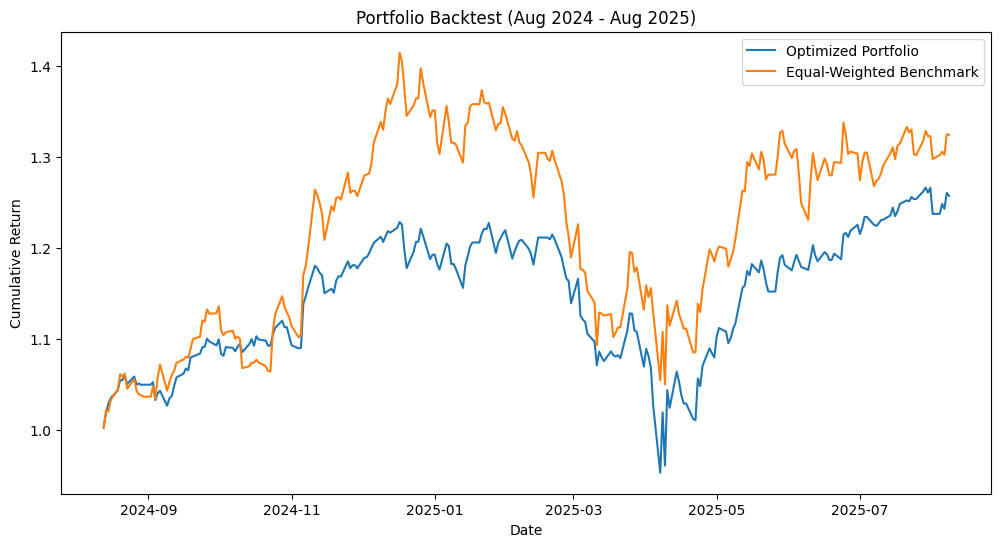

In [6]:
# Step 5: Visualize
plt.figure(figsize=(12,6))
plt.plot(cumulative_returns, label='Optimized Portfolio')
plt.plot(cumulative_benchmark, label='Equal-Weighted Benchmark')
plt.title(f'Portfolio Backtest (Aug 2024 - Aug 2025)')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.savefig('../reports/figures/backtest_returns.png')
plt.show()

In [7]:
# Step 6: Performance metrics
annualized_return = (cumulative_returns[-1] ** (252 / len(returns))) - 1
annualized_vol = portfolio_returns.std() * np.sqrt(252)
sharpe_ratio = annualized_return / annualized_vol
print(f"Optimized Portfolio: Annualized Return={annualized_return:.2%}, Volatility={annualized_vol:.2%}, Sharpe={sharpe_ratio:.2f}")

Optimized Portfolio: Annualized Return=24.98%, Volatility=22.79%, Sharpe=1.10


C:\Users\zyona\AppData\Local\Temp\ipykernel_12320\20176168.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  annualized_return = (cumulative_returns[-1] ** (252 / len(returns))) - 1
